# ANN

<h2>Load Dataset</h2>

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)

In [12]:
dataset = pd.read_csv('Churn_Modelling.csv')
df = pd.DataFrame(dataset)

In [3]:
pd.DataFrame(dataset).head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [5]:
pd.DataFrame(X).head(10)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.0,2,1,1,10062.8
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.5
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [6]:
pd.DataFrame(y).head(10)

,0
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,0
9,0


<h1>Label Encoder</h1>

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [9]:
pd.DataFrame(X).head(10)

,0,1,2,3,4,5,6,7,8,9
0,619,France,0,42,2,0.0,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.8,3,1,0,113931.57
3,699,France,0,39,1,0.0,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.0,2,1,1,10062.8
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.5
9,684,France,1,27,2,134603.88,1,1,1,71725.73


<h1>One-hot encoding</h1>


In [15]:
df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('ohe', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype = np.str) #.toarray()
pd.DataFrame(X).head(10)


<ipython-input-11-0e7607c3269a>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(ct.fit_transform(X), dtype = np.str) #.toarray()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,1.0,0.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,1.0,0.0,850,0,43,2,125510.82,1,1,1,79084.1
5,0.0,1.0,0.0,645,1,44,8,113755.78,2,1,0,149756.71
6,1.0,0.0,0.0,822,1,50,7,0.0,2,1,1,10062.8
7,1.0,0.0,1.0,376,0,29,4,115046.74,4,1,0,119346.88
8,1.0,0.0,0.0,501,1,44,4,142051.07,2,0,1,74940.5
9,1.0,0.0,0.0,684,1,27,2,134603.88,1,1,1,71725.73


```
if(column1, column2){Geography}

if(0,0){France}
if(1,0){Spain}
if(0,1){Germany}
```

In [16]:
X = X[:, 1:]
pd.DataFrame(X).head(10)


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,1.0,0.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,1.0,0.0,850,0,43,2,125510.82,1,1,1,79084.1
5,1.0,0.0,645,1,44,8,113755.78,2,1,0,149756.71
6,0.0,0.0,822,1,50,7,0.0,2,1,1,10062.8
7,0.0,1.0,376,0,29,4,115046.74,4,1,0,119346.88
8,0.0,0.0,501,1,44,4,142051.07,2,0,1,74940.5
9,0.0,0.0,684,1,27,2,134603.88,1,1,1,71725.73


<h1>Training and Test Sets: Splitting Data</h1>

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.2, random_state = 0)

<h1>Feature scaling</h1>


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
pd.DataFrame(X_train).head(10)


,0,1,2,3,4,5,6,7,8,9,10
0,1.743090,-0.569844,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-0.573694,1.754865,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-0.573694,-0.569844,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,1.743090,-0.569844,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,1.743090,-0.569844,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
5,-0.573694,1.754865,1.293254,-1.091687,-0.177495,-1.031415,0.442535,0.809503,0.642595,-1.032270,1.632521
6,-0.573694,-0.569844,1.612831,0.916013,0.779547,-1.377440,0.304328,-0.921591,-1.556190,-1.032270,0.481496
7,1.743090,-0.569844,-0.541734,0.916013,0.205321,1.044737,-1.215717,0.809503,0.642595,0.968738,1.073822
8,1.743090,-0.569844,-0.149995,0.916013,3.554968,1.390762,0.806330,-0.921591,0.642595,0.968738,-1.049498
9,-0.573694,-0.569844,-0.294320,-1.091687,-0.656016,0.352686,1.486364,0.809503,0.642595,-1.032270,0.015394


<h1>Building the Artificial Neural Network</h1>

In [40]:
from tensorflow.keras.models import Sequential 
#from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [50]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


<AxesSubplot:xlabel='label', ylabel='count'>

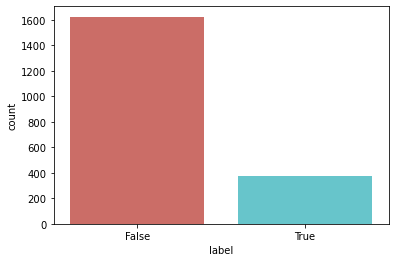

In [85]:
import seaborn as sns

df_y_pred = pd.DataFrame(y_pred)

df_y_pred.rename(columns={df_y_pred.columns[0]: 'label'}, inplace=True)

sns.countplot(x='label', data=df_y_pred, palette='hls')


<img src="./confusion_matrix_1.png"></img>

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1456  139]
 [ 168  237]]


0.8465

# CNN

In [89]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, Dense

In [90]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

11501568/11490434 [==============================] - 14s 1us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [91]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1475 - accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0512 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - 

In [92]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9869


[0.053837310522794724, 0.9868999719619751]